In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fresco.potentials import UwU
from fresco.optimize import LBFGS_CPP

In [2]:
Nside = 100       # Half side length of grid (will be 2*Nside+1)
ndim = 2          # Dimensions
L = np.ones(ndim) # 1x1 square box
gridsize = np.ones(ndim,dtype=np.int32)*int(2*Nside+1) # grid shape
x0 = np.random.random(gridsize) # Random initial condition

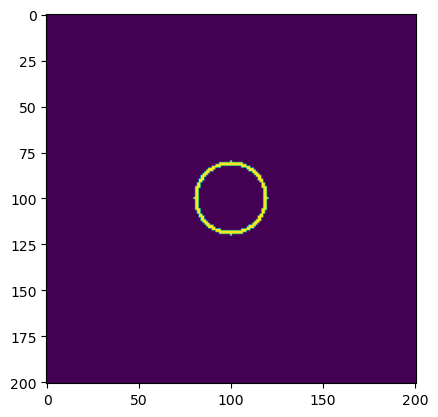

In [39]:
K = 20           # Limit of k-space we are constraining

# Create array of k-vector magnitudes
Kvec = np.arange(-Nside,Nside+1).reshape((1,-1))
Kmag = np.sqrt(Kvec**2 + (Kvec**2).T)

# Create the mask of k-vectors to be constrained
Kmask = np.array(Kmag <= K,dtype=np.int32)*np.array(Kmag >= K*0.9,dtype=np.int32)

fig = plt.figure()
ax = fig.gca()
ax.imshow(Kmask)
plt.show()

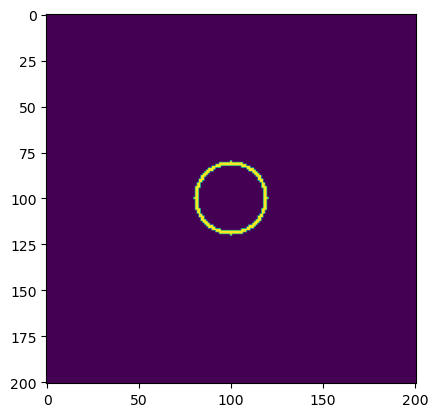

In [40]:
# Create the array of structure factor values corresponding to the k-vectors to be constrained
Sk = np.ones(Kmag.shape)*10

fig = plt.figure()
ax = fig.gca()
ax.imshow(Sk*Kmask)
plt.show()
# Create the weighting function
wk = Kmask

# Don't constrain the trivial peak at S(k=0)
center = int(Kmask.shape[0]/2)
wk[center,center] = 0

In [41]:
loss = UwU(gridsize, K, Sk, wk, L) # Initialize loss function
minimizer = LBFGS_CPP(x0.ravel(), loss, iprint=100) # Initialize minimizer

In [42]:
# Run the minimization
minimizer.run(10000)
res = minimizer.get_result()
x = np.array(res.coords)

lbgs: 0 E 181.69459444466375 rms 0.067421055931138243 nfev 4 step norm 0.025000000000000001
lbgs: 100 E 52.355569245842872 rms 0.11758001312972668 nfev 366 step norm 9.7656250000000005e-05
lbgs: 200 E 22.193232066079663 rms 0.043240785302485117 nfev 751 step norm 0.0062896093526719349
lbgs: 300 E 59.709100976605626 rms 0.059910986758843043 nfev 1221 step norm 9.7656250000000005e-05
lbgs: 400 E 27.02288336659506 rms 0.053322080082657083 nfev 1665 step norm 0.024999999999999998
lbgs: 500 E 0.24174196399092246 rms 0.0072286062132477895 nfev 2077 step norm 0.00030005698362091545
lbgs: 600 E 76.021869890955074 rms 0.19255032224314317 nfev 2572 step norm 5.0633150235500884e-08
lbgs: 700 E 57.673357946109697 rms 0.056270202541314818 nfev 2982 step norm 0.05000000000000001
lbgs: 800 E 0.49965221575060315 rms 0.0105227169332385 nfev 3439 step norm 9.7656250000000005e-05
lbgs: 900 E 13.703576223797798 rms 0.040935517441910735 nfev 3913 step norm 0.00021146305361536299
lbgs: 1000 E 37.17972919482

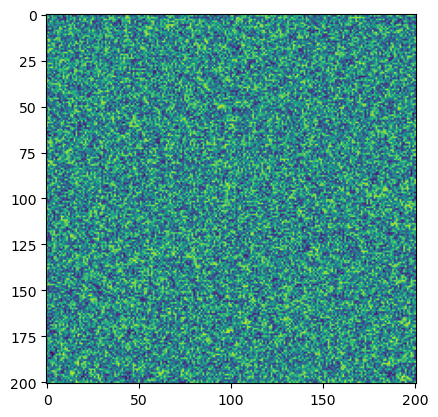

In [45]:
output = x.reshape(gridsize)

fig = plt.figure()
ax = fig.gca()
ax.imshow(output)

ax.set_aspect('equal')
plt.show()

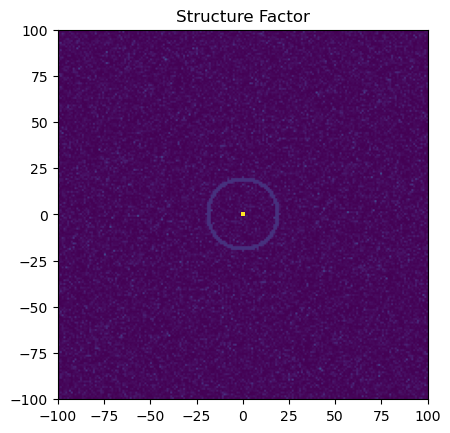

In [46]:
rhohat = np.fft.fftshift(np.fft.fft2(output))

Sk = np.absolute(rhohat)**2
Sk /= np.sum(np.absolute(output)**2)


fig = plt.figure()
ax = fig.gca()
ax.imshow(Sk,vmin=0,vmax=10,extent=[-Nside, Nside, -Nside, Nside])
ax.set_title("Structure Factor")
plt.show()